# 타이타닉 생존자 예측

## 기본 설정 및 데이터 불러오기

### 라이브러리 불러오기

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


### 데이터 로드

In [2]:
titanic_df = pd.read_csv(r"C:\data\train.csv")
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [4]:
# age, cabin, embarked 는 null 값이 있으므로 전처리 함

titanic_df["Age"].fillna(titanic_df["Age"].mean(), inplace = True)
titanic_df["Cabin"].fillna("N", inplace = True)
titanic_df["Embarked"].fillna("N", inplace = True)

titanic_df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

In [5]:
print(titanic_df["Sex"].value_counts())
print(titanic_df["Cabin"].value_counts())
print(titanic_df["Embarked"].value_counts())


male      577
female    314
Name: Sex, dtype: int64
N              687
G6               4
C23 C25 C27      4
B96 B98          4
E101             3
              ... 
C148             1
B78              1
A20              1
C54              1
A7               1
Name: Cabin, Length: 148, dtype: int64
S    644
C    168
Q     77
N      2
Name: Embarked, dtype: int64


In [6]:
titanic_df["Cabin"] = titanic_df["Cabin"].str[:1]

In [7]:
#성별이 생존 확률에 어떤 영향을 미쳤는가?

titanic_df.groupby(["Sex","Survived"])["Survived"].count()

Sex     Survived
female  0            81
        1           233
male    0           468
        1           109
Name: Survived, dtype: int64

<AxesSubplot:xlabel='Sex', ylabel='Survived'>

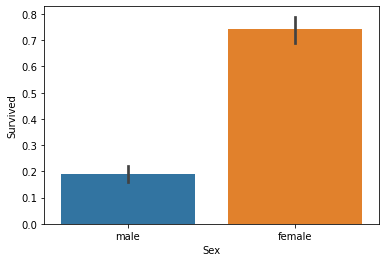

In [8]:
sns.barplot(data = titanic_df, x= "Sex", y="Survived")

In [9]:
# 부에 따른 생존 확률은 어떠한가?

titanic_df.groupby(["Pclass","Survived"])["Survived"].count()

Pclass  Survived
1       0            80
        1           136
2       0            97
        1            87
3       0           372
        1           119
Name: Survived, dtype: int64

<AxesSubplot:xlabel='Pclass', ylabel='Survived'>

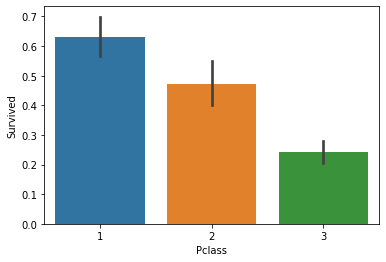

In [10]:
sns.barplot(data = titanic_df, x= "Pclass", y="Survived")

<AxesSubplot:xlabel='Pclass', ylabel='Survived'>

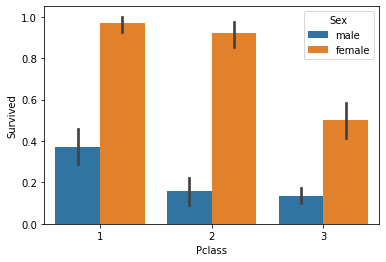

In [11]:
# 성별과 부에 따른 생존확률은 어떠한가?

sns.barplot(data = titanic_df, x= "Pclass", y="Survived", hue = "Sex")

<AxesSubplot:xlabel='Age_cat', ylabel='Survived'>

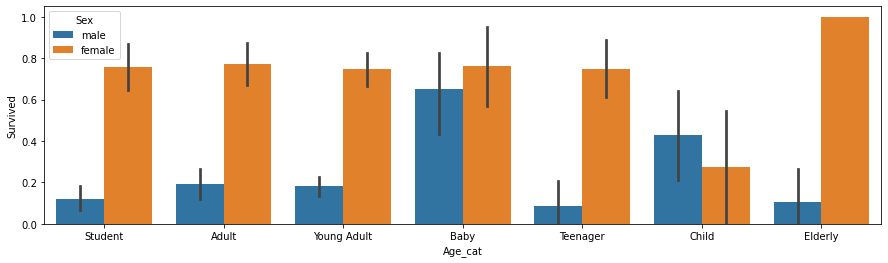

In [12]:
#나이에 따른 생존확률은 어떠한가?

def get_category(age) :
    cat = ""
    if age <= -1 : cat ="Unknown"
    elif age <= 5 : cat = "Baby"
    elif age <= 12 : cat = "Child"
    elif age <= 18 : cat = "Teenager"
    elif age <= 25 : cat = "Student"
    elif age <= 35 : cat = "Young Adult"
    elif age <= 60 : cat = "Adult"
    else : cat = "Elderly"
        
    return cat
    
titanic_df["Age_cat"] = titanic_df["Age"].apply(lambda x : get_category(x))

plt.figure(figsize = (15,4))
sns.barplot(data = titanic_df, x = "Age_cat", y = "Survived", hue = "Sex")

#위 세가지 항목을 종합시, 나이/성별/부의 여부에 따른 생존확률의 차이가 있다. 즉, 나이/성별/부는 생존확률을 예측하는 주요 피쳐가 된다.

### 레이블 인코딩 및 데이터 전처리

In [13]:
from sklearn import preprocessing

# 레이블 인코딩 함수
def encode_features(dataDF) :
    features = ["Cabin","Sex","Embarked"]
    for feature in features:
        le = preprocessing.LabelEncoder()
        le = le.fit(dataDF[feature])
        dataDF[feature] = le.transform(dataDF[feature])
        
    return dataDF[feature]


titanic_df2 = encode_features(titanic_df)
titanic_df2.head()

0    3
1    0
2    3
3    3
4    3
Name: Embarked, dtype: int32

In [14]:
titanic_df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age_cat
0,1,0,3,"Braund, Mr. Owen Harris",1,22.000000,1,0,A/5 21171,7.2500,7,3,Student
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.000000,1,0,PC 17599,71.2833,2,0,Adult
2,3,1,3,"Heikkinen, Miss. Laina",0,26.000000,0,0,STON/O2. 3101282,7.9250,7,3,Young Adult
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.000000,1,0,113803,53.1000,2,3,Young Adult
4,5,0,3,"Allen, Mr. William Henry",1,35.000000,0,0,373450,8.0500,7,3,Young Adult
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",1,27.000000,0,0,211536,13.0000,7,3,Young Adult
887,888,1,1,"Graham, Miss. Margaret Edith",0,19.000000,0,0,112053,30.0000,1,3,Student
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",0,29.699118,1,2,W./C. 6607,23.4500,7,3,Young Adult
889,890,1,1,"Behr, Mr. Karl Howell",1,26.000000,0,0,111369,30.0000,2,0,Young Adult


In [15]:
#na 처리
def fillNa(df):
    df["Age"].fillna(df["Age"].mean(), inplace = True)
    df["Cabin"].fillna("N", inplace = True)
    df["Embarked"].fillna("N", inplace = True)
    df["Fare"].fillna(0, inplace = True)
    return df

    
#불필요한 속성 제거
def drop_features(df) :
    df.drop(["PassengerId","Name","Ticket"], axis = 1 , inplace = True)
    return df


#레이블 인코딩
def encode_features(df) :
    df["Cabin"] = df["Cabin"].str[:1]
    features = ["Cabin","Sex","Embarked"]
    for feature in features:
        le = preprocessing.LabelEncoder()
        le = le.fit(df[feature])
        df[feature] = le.transform(df[feature])
        
    return df

    
#함수 종합
def transform_features(df):
    df = fillNa(df)
    df = drop_features(df)
    df = encode_features(df)
    return df

In [16]:
titanic_df = pd.read_csv(r"C:\data\train.csv")

y_titanic_df = titanic_df["Survived"] #클래스 결정값 데이터 세트
x_titanic_df = titanic_df.drop("Survived", axis = 1) #피쳐 데이터 세트

x_titanic_df = transform_features(x_titanic_df)

In [17]:
x_titanic_df

,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,3,1,22.000000,1,0,7.2500,7,3
1,1,0,38.000000,1,0,71.2833,2,0
2,3,0,26.000000,0,0,7.9250,7,3
3,1,0,35.000000,1,0,53.1000,2,3
4,3,1,35.000000,0,0,8.0500,7,3
...,...,...,...,...,...,...,...,...
886,2,1,27.000000,0,0,13.0000,7,3
887,1,0,19.000000,0,0,30.0000,1,3
888,3,0,29.699118,1,2,23.4500,7,3
889,1,1,26.000000,0,0,30.0000,2,0


In [18]:
#테스트 데이터 세트 추출
from sklearn.model_selection import train_test_split

X_train,X_test, Y_train, Y_test = train_test_split(x_titanic_df, y_titanic_df, test_size = 0.2, random_state = 11)

In [19]:
from sklearn.tree import DecisionTreeClassifier #결정트리
from sklearn.ensemble import RandomForestClassifier #랜덤포레스트
from sklearn.linear_model import LogisticRegression #로지스틱 회귀(분류알고리즘)
from sklearn.metrics import accuracy_score #예측 성능 평가 : 정확도

#사이킷런 클래스 생성
dt_clf = DecisionTreeClassifier(random_state = 11)
rf_clf = RandomForestClassifier(random_state = 11)
lr_clf = LogisticRegression()


#결정트리 학습/예측/평가
dt_clf.fit(X_train,Y_train)
dt_pred = dt_clf.predict(X_test)
print("DecisionTreeClassifier 정확도 : {0:.4f}".format(accuracy_score(Y_test, dt_pred)))


#랜덤포레스트 학습/예측/평가
rf_clf.fit(X_train,Y_train)
rf_pred = rf_clf.predict(X_test)
print("RandomForestClassifier 정확도 : {0:.4f}".format(accuracy_score(Y_test, rf_pred)))


#로지스틱 회귀 학습/예측/평가
lr_clf.fit(X_train,Y_train)
lr_pred = lr_clf.predict(X_test)
print("LogisticRegression 정확도 : {0:.4f}".format(accuracy_score(Y_test, lr_pred)))


DecisionTreeClassifier 정확도 : 0.7877
RandomForestClassifier 정확도 : 0.8547
LogisticRegression 정확도 : 0.8492


C:\Users\sbpark\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [20]:
#교차검증으로 재확인

from sklearn.model_selection import KFold

def exec_kfold(clf, folds = 5):
    kfold = KFold(n_splits = folds)
    scores = []
    
    
    
    for iter_count, (train_index, test_index) in enumerate(kfold.split(x_titanic_df)):
        X_train, X_test = x_titanic_df.values[train_index], x_titanic_df.values[test_index]
        Y_train, Y_test = y_titanic_df.values[train_index], y_titanic_df.values[test_index]

        clf.fit(X_train, Y_train)
        predictions = clf.predict(X_test)
        accuracy = accuracy_score(Y_test, predictions)
        scores.append(accuracy)
        print("교차검증 {0} 정확도 : {1:.4f}".format(iter_count,accuracy))



    mean_score = np.mean(scores)
    print("평균 정확도 {0:.4f}".format(mean_score))

exec_kfold(dt_clf, folds= 5)

교차검증 0 정확도 : 0.7542
교차검증 1 정확도 : 0.7809
교차검증 2 정확도 : 0.7865
교차검증 3 정확도 : 0.7697
교차검증 4 정확도 : 0.8202
평균 정확도 0.7823


In [21]:
#cross_val_score()로 실행

from sklearn.model_selection import cross_val_score

scores = cross_val_score(dt_clf, x_titanic_df, y_titanic_df, cv = 5)

for iter_count, accuracy in enumerate(scores):
    print("교차검증 {0} 정확도 : {1:.4f}".format(iter_count,accuracy))
print("평균 정확도 {0:.4f}".format(np.mean(scores)))

교차검증 0 정확도 : 0.7430
교차검증 1 정확도 : 0.7753
교차검증 2 정확도 : 0.7921
교차검증 3 정확도 : 0.7865
교차검증 4 정확도 : 0.8427
평균 정확도 0.7879


In [22]:
#GridSearchCV 로 최적의 파라미터 찾기 실행

from sklearn.model_selection import GridSearchCV

parameters = {"max_depth": [2,3,5,10], "min_samples_split": [2,3,5], "min_samples_leaf":[1,5,8]}

grid_dclf = GridSearchCV(dt_clf, param_grid = parameters, scoring="accuracy", cv = 5)
grid_dclf.fit(X_train, Y_train)

print("최적 하이퍼 파라미터 :", grid_dclf.best_params_)
print("최고 정확도 :", grid_dclf.best_score_)

best_dclf = grid_dclf.best_estimator_

dpredictions = best_dclf.predict(X_test)
accuracy = accuracy_score(Y_test, dpredictions)

print("테스트 세트에서의 결정트리 정확도", accuracy)

최적 하이퍼 파라미터 : {'max_depth': 3, 'min_samples_leaf': 5, 'min_samples_split': 2}
최고 정확도 : 0.7991825076332119
테스트 세트에서의 결정트리 정확도 0.8715083798882681


## 정확도의 오류 상황

In [23]:
# 이진 분류에서 정확도 평가가 가질 수 있는 오류 상황
from sklearn.base import BaseEstimator

class MyDummyClassifier(BaseEstimator):
    def fit(self, x, y=None):
        pass

    def predict(self, x):
        pred = np.zeros((x.shape[0],1))
        for i in range(x.shape[0]):
            if x['Sex'].iloc[i] == 1:
                pred[i] = 0
            else : 
                pred[i] = 1
                
        return pred


In [24]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score 

titanic_df = pd.read_csv(r"C:\data\train.csv")

y_titanic_df = titanic_df["Survived"]
x_titanic_df = titanic_df.drop("Survived", axis = 1)
x_titanic_df = transform_features(x_titanic_df)
X_train,X_test, Y_train, Y_test = train_test_split(x_titanic_df, y_titanic_df, test_size = 0.2, random_state = 0)

myclf = MyDummyClassifier()
myclf.fit(X_train,Y_train)
mypredictions = myclf.predict(X_test)

print("Dummy Classifier 의 정확도는 : {0:.4f}".format(accuracy_score(Y_test,mypredictions )))

Dummy Classifier 의 정확도는 : 0.7877


## 정밀도와 재현율

In [25]:
#정확도, 오차행렬, 정밀도, 재현율 체크
from sklearn.metrics import accuracy_score, precision_score,recall_score, confusion_matrix

def get_clf_eval(Y_test, pred):
    confusion = confusion_matrix(Y_test, pred)
    accuracy = accuracy_score(Y_test, pred)
    precision = precision_score(Y_test, pred)
    recall = recall_score(Y_test, pred)
    
    print('오차행렬')
    print(confusion)
    print("정확도 {0:.4f}, 정밀도 {1:.4f}, 재현율 {2:.4f}".format(accuracy,precision,recall))

In [26]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

titanic_df = pd.read_csv(r"C:\data\train.csv")
y_titanic_df = titanic_df["Survived"]
x_titanic_df = titanic_df.drop("Survived", axis = 1)
x_titanic_df = transform_features(x_titanic_df)

X_train,X_test, Y_train, Y_test = train_test_split(x_titanic_df, y_titanic_df, test_size = 0.2, random_state = 2)

lr_clf = LogisticRegression( max_iter=500)
lr_clf.fit(X_train,Y_train)
pred = lr_clf.predict(X_test)
get_clf_eval(Y_test, pred)

# 정밀도에 비해 재현율이 낮아 강화 필요함

오차행렬
[[88 12]
 [28 51]]
정확도 0.7765, 정밀도 0.8095, 재현율 0.6456


### 정밀도와 재현율의 트레이드 오프

In [27]:
pred_proba = lr_clf.predict_proba(X_test)
pred = lr_clf.predict(X_test)
print("pred_proba()의 결과 Shape : {0}".format(pred_proba.shape))
print("pred_proba array에서 앞 3개만 샘플로 추출 \n", pred_proba[:3])

pred_proba_result = np.concatenate([pred_proba, pred.reshape(-1,1)], axis = 1)
print("두 개의 클레스 중에서 더 큰 확률을 클래스 값으로 예측 \n", pred_proba_result[:3])

pred_proba()의 결과 Shape : (179, 2)
pred_proba array에서 앞 3개만 샘플로 추출 
 [[0.68095673 0.31904327]
 [0.87579774 0.12420226]
 [0.23643579 0.76356421]]
두 개의 클레스 중에서 더 큰 확률을 클래스 값으로 예측 
 [[0.68095673 0.31904327 0.        ]
 [0.87579774 0.12420226 0.        ]
 [0.23643579 0.76356421 1.        ]]


In [28]:
from sklearn.preprocessing import Binarizer

x = [[1,-1,2],
    [2,0,0],
    [0,1.1,1.2]]

#x의 개별 원소들이 threshold 값보다 같거나 작으면 0, 크면 1 반환

binarizer = Binarizer(threshold = 1.1)
print(binarizer.fit_transform(x))

[[0. 0. 1.]
 [1. 0. 0.]
 [0. 0. 1.]]


In [29]:
from sklearn.preprocessing import Binarizer

custon_threshold = 0.4

pred_proba_1 = pred_proba[:,1].reshape(-1,1)

binarizer = Binarizer(threshold =custon_threshold).fit(pred_proba_1)
custom_predict = binarizer.transform(pred_proba_1)

get_clf_eval(Y_test,custom_predict)

오차행렬
[[84 16]
 [25 54]]
정확도 0.7709, 정밀도 0.7714, 재현율 0.6835


In [30]:
thresholds = [0.4,0.45,0.5,0.55,0.6]

def get_eval_by_thresholds(Y_test, pred_proba_c1, thresholds):
    #trhesholds list 객체 내의 값을 차례로 iteration 하면서 evaluation 수행
    for custom_thresholds in thresholds:
        binarizer = Binarizer(threshold =custom_thresholds).fit(pred_proba_c1)
        custom_predict = binarizer.transform(pred_proba_c1)
        print("임곗값 : ", custom_thresholds)
        get_clf_eval(Y_test,custom_predict)
        
get_eval_by_thresholds(Y_test, pred_proba[:,1].reshape(-1,1),thresholds )

임곗값 :  0.4
오차행렬
[[84 16]
 [25 54]]
정확도 0.7709, 정밀도 0.7714, 재현율 0.6835
임곗값 :  0.45
오차행렬
[[84 16]
 [26 53]]
정확도 0.7654, 정밀도 0.7681, 재현율 0.6709
임곗값 :  0.5
오차행렬
[[88 12]
 [28 51]]
정확도 0.7765, 정밀도 0.8095, 재현율 0.6456
임곗값 :  0.55
오차행렬
[[92  8]
 [33 46]]
정확도 0.7709, 정밀도 0.8519, 재현율 0.5823
임곗값 :  0.6
오차행렬
[[95  5]
 [35 44]]
정확도 0.7765, 정밀도 0.8980, 재현율 0.5570


In [31]:
from sklearn.metrics import precision_recall_curve

#레이블 값이 1일 때의 예측 확률을 추출
pred_proba_class= lr_clf.predict_proba(X_test)[:,1]

#실제값 데이터 세트와 레이블 값이 1일 때의 예측확률을 precision_recall_curve 인자로 입력
precisions, recalls, thresholds = precision_recall_curve(Y_test, pred_proba_class)
print("반환된 분류 결정 임곗값 배열의 shape : ", thresholds.shape)

# 반환된 임곗값 배열 로우가 162 건이므로 샘플로 10건만 추출하되, 임곗값을 15step으로 추출
thr_index = np.arange(0, thresholds.shape[0],15)
print("샘플 추출을 위한 임곗값 배열의 index 10개 : ", thr_index)
print("샘플용 10개의 임곗값 : ", np.round(thresholds[thr_index],2))

#15 step 담위로 추출된 임곗값에 따른 정밀도와 재현율
print("샘플 임곗값 별 정밀도 :", np.round(precisions[thr_index],3))
print("샘플 임곗값 별 재현율 :", np.round(recalls[thr_index],3))

반환된 분류 결정 임곗값 배열의 shape :  (162,)
샘플 추출을 위한 임곗값 배열의 index 10개 :  [  0  15  30  45  60  75  90 105 120 135 150]
샘플용 10개의 임곗값 :  [0.05 0.08 0.09 0.11 0.14 0.23 0.39 0.54 0.67 0.8  0.91]
샘플 임곗값 별 정밀도 : [0.467 0.494 0.537 0.568 0.631 0.724 0.764 0.825 0.929 0.963 1.   ]
샘플 임곗값 별 재현율 : [1.    0.962 0.911 0.848 0.823 0.797 0.696 0.595 0.494 0.329 0.152]


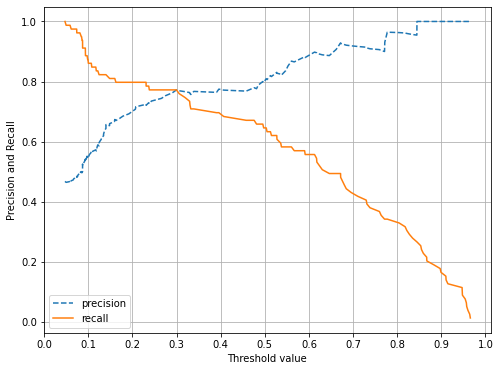

In [32]:
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
%matplotlib inline

def precision_recall_curve_plot(Y_test, pred_proba_c1):
    precisions, recalls, thresholds = precision_recall_curve(Y_test, pred_proba_c1)
    
    plt.figure(figsize = (8,6))
    threshold_boundary = thresholds.shape[0]
    plt.plot(thresholds, precisions[0:threshold_boundary], linestyle = '--', label = 'precision')
    plt.plot(thresholds, recalls[0:threshold_boundary], label = 'recall')
    
    start, end = plt.xlim()
    plt.xticks(np.round(np.arange(start, end,0.1),2))
    
    plt.xlabel('Threshold value'); plt.ylabel('Precision and Recall')
    
    plt.legend(); plt.grid()

    plt.show()

    
precision_recall_curve_plot(Y_test, lr_clf.predict_proba(X_test)[:,1])

In [33]:
from sklearn.metrics import f1_score

f1 = f1_score(Y_test, pred)
print("f1 스코어 ; {0:.4f}".format(f1))

f1 스코어 ; 0.7183


In [45]:
def get_clf_eval(Y_test, pred):
    confusion = confusion_matrix(Y_test, pred)
    accuracy = accuracy_score(Y_test, pred)
    precision = precision_score(Y_test, pred)
    recall = recall_score(Y_test, pred)
    f1 = f1_score(Y_test, pred)
    
    print('오차행렬')
    print(confusion)
    print("정확도 {0:.4f}, 정밀도 {1:.4f}, 재현율 {2:.4f}, f1 {3:.4f}".format(accuracy,precision,recall, f1))
    
thresholds = [0.4,0.45,0.5,0.55,0.6]
pred_proba = lr_clf.predict_proba(X_test)
get_eval_by_thresholds(Y_test, pred_proba[:,1].reshape(-1,1),thresholds )

임곗값 :  0.4
오차행렬
[[84 16]
 [25 54]]
정확도 0.7709, 정밀도 0.7714, 재현율 0.6835, f1 0.7248
임곗값 :  0.45
오차행렬
[[84 16]
 [26 53]]
정확도 0.7654, 정밀도 0.7681, 재현율 0.6709, f1 0.7162
임곗값 :  0.5
오차행렬
[[88 12]
 [28 51]]
정확도 0.7765, 정밀도 0.8095, 재현율 0.6456, f1 0.7183
임곗값 :  0.55
오차행렬
[[92  8]
 [33 46]]
정확도 0.7709, 정밀도 0.8519, 재현율 0.5823, f1 0.6917
임곗값 :  0.6
오차행렬
[[95  5]
 [35 44]]
정확도 0.7765, 정밀도 0.8980, 재현율 0.5570, f1 0.6875


### ROC 곡선

In [39]:
from sklearn.metrics import roc_curve

#레이블 값이 1일 때의 예측 확률 추출
pred_proba_class1 = lr_clf.predict_proba(X_test)[:,1]

fprs, tprs, thresholds = roc_curve(Y_test, pred_proba_class1)
#반환된 임곗값 배열에서 샘플로 데이터를 추출하되 임곗값을 5step으로 추출

thr_index = np.arange(1, thresholds.shape[0], 5)

print("샘플 추출을 위한 임곗값 배열의 인덱스", thr_index)
print("샘플 index로 추출한 임곗값", np.round(thresholds[thr_index],2))

print("샘플 임곗값별 FPR", np.round(fprs[thr_index],3))
print("샘플 임곗값별 TPR", np.round(tprs[thr_index],3))

샘플 추출을 위한 임곗값 배열의 인덱스 [ 1  6 11 16 21 26 31 36 41 46 51 56 61 66]
샘플 index로 추출한 임곗값 [0.97 0.67 0.57 0.51 0.48 0.34 0.23 0.16 0.12 0.1  0.09 0.09 0.07 0.  ]
샘플 임곗값별 FPR [0.   0.03 0.07 0.11 0.15 0.17 0.24 0.31 0.5  0.56 0.66 0.75 0.82 1.  ]
샘플 임곗값별 TPR [0.013 0.494 0.57  0.633 0.658 0.709 0.785 0.81  0.835 0.873 0.911 0.937
 0.975 1.   ]


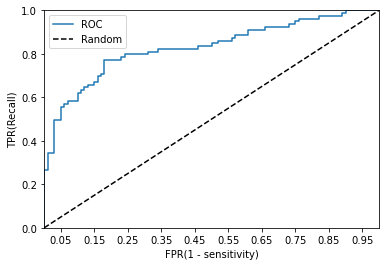

In [40]:
def roc_curve_plot(Y_test, pred_proba_c1):
    fprs, tprs, thresholds = roc_curve(Y_test, pred_proba_c1)
    
    plt.plot(fprs, tprs, label = "ROC")
    plt.plot([0,1],[0,1],'k--', label = "Random")
    
    start, end = plt.xlim()
    plt.xticks(np.round(np.arange(start, end,0.1),2))
    plt.xlim(0,1); plt.ylim(0,1)
    plt.xlabel("FPR(1 - sensitivity)"); plt.ylabel("TPR(Recall)")
    plt.legend()
    
    
roc_curve_plot(Y_test, pred_proba[:,1])

In [41]:
from sklearn.metrics import roc_auc_score

pred_proba = lr_clf.predict_proba(X_test)[:,1]
roc_score = roc_auc_score(Y_test, pred_proba)
print("ROC AUC 값 : {0:.4f}".format(roc_score))

ROC AUC 값 : 0.8296


In [1]:
def get_clf_eval(Y_test, pred = None, pred_proba = None):
    confusion = confusion_matrix(Y_test, pred)
    accuracy = accuracy_score(Y_test, pred)
    precision = precision_score(Y_test, pred)
    recall = recall_score(Y_test, pred)
    f1 = f1_score(Y_test, pred)
    roc_score = roc_auc_score(Y_test, pred_proba)
    
    print('오차행렬')
    print(confusion)
    print("정확도 {0:.4f}, 정밀도 {1:.4f}, 재현율 {2:.4f}, f1 {3:.4f}, AUC 값 : {4:.4f}".format(accuracy,precision,recall, f1,roc_score))
    
